In [1]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
subway = gdp.read_file('../projects/NYSubways.geojson')
subway.head(3)

,station_id,north_direction_label,line,daytime_routes,complex_id,division,ada_southbound,gtfs_stop_id,structure,ada_notes,stop_name,gtfs_longitude,ada_northbound,ada,south_direction_label,borough,gtfs_latitude,geometry
0,1,Last Stop,Astoria,N W,1,BMT,0,R01,Elevated,None,Astoria-Ditmars Blvd,-73.912034,0,0,Manhattan,Q,40.775036,POINT (-73.91203 40.77504)
1,2,Astoria,Astoria,N W,2,BMT,1,R03,Elevated,None,Astoria Blvd,-73.917843,1,1,Manhattan,Q,40.770258,POINT (-73.91784 40.77026)
2,3,Astoria,Astoria,N W,3,BMT,0,R04,Elevated,None,30 Av,-73.921479,0,0,Manhattan,Q,40.766779,POINT (-73.92148 40.76678)


In [3]:
subway = subway [['station_id', 'line', 'gtfs_stop_id', 'stop_name', 'gtfs_longitude', 'gtfs_latitude', 'geometry']]
subway.head()

,station_id,line,gtfs_stop_id,stop_name,gtfs_longitude,gtfs_latitude,geometry
0,1,Astoria,R01,Astoria-Ditmars Blvd,-73.912034,40.775036,POINT (-73.91203 40.77504)
1,2,Astoria,R03,Astoria Blvd,-73.917843,40.770258,POINT (-73.91784 40.77026)
2,3,Astoria,R04,30 Av,-73.921479,40.766779,POINT (-73.92148 40.76678)
3,4,Astoria,R05,Broadway,-73.925508,40.76182,POINT (-73.92551 40.76182)
4,5,Astoria,R06,36 Av,-73.929575,40.756804,POINT (-73.92957 40.75680)


In [25]:
subway.rename(columns = {'gtfs_longitude':'lng', 'gtfs_latitude':'lat'})

,station_id,line,gtfs_stop_id,stop_name,lng,lat,geometry
0,1,Astoria,R01,Astoria-Ditmars Blvd,-73.912034,40.775036,POINT (-73.91203 40.77504)
1,2,Astoria,R03,Astoria Blvd,-73.917843,40.770258,POINT (-73.91784 40.77026)
2,3,Astoria,R04,30 Av,-73.921479,40.766779,POINT (-73.92148 40.76678)
3,4,Astoria,R05,Broadway,-73.925508,40.76182,POINT (-73.92551 40.76182)
4,5,Astoria,R06,36 Av,-73.929575,40.756804,POINT (-73.92957 40.75680)
...,...,...,...,...,...,...,...
491,517,Staten Island,S15,Prince's Bay,-74.200064,40.525507,POINT (-74.20006 40.52551)
492,518,Staten Island,S14,Pleasant Plains,-74.217847,40.52241,POINT (-74.21785 40.52241)
493,519,Staten Island,S13,Richmond Valley,-74.229141,40.519631,POINT (-74.22914 40.51963)
494,522,Staten Island,S09,Tottenville,-74.251961,40.512764,POINT (-74.25196 40.51276)


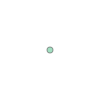

In [5]:
subway.loc[0, 'geometry']

In [6]:
print(subway.loc[0, 'geometry'])

POINT (-73.912034 40.775036)


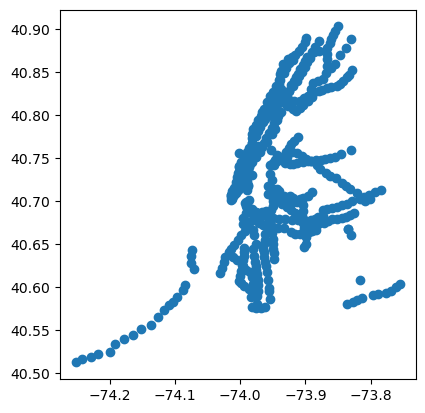

In [7]:
subway.plot();

In [8]:
center = subway.geometry.centroid[152]
print(center)

POINT (-73.952343 40.811109)


C:\Users\shane\AppData\Local\Temp\ipykernel_121008\4111345419.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = subway.geometry.centroid[152]


In [9]:
ny_center = (center.y, center.x)

In [10]:
ny_map = folium.Map(location = ny_center, zoom_start = 11.5)
ny_map

In [11]:
i = 0
for row_index, row_values in subway.iterrows():
    if i<3:
        print ('index is', row_index)
        print('values are: ')
        print('   ')
        print(row_values)
        print('----------------------')
        i+=1

index is 0
values are: 
   
station_id                                   1
line                                   Astoria
gtfs_stop_id                               R01
stop_name                 Astoria-Ditmars Blvd
gtfs_longitude                      -73.912034
gtfs_latitude                        40.775036
geometry          POINT (-73.912034 40.775036)
Name: 0, dtype: object
----------------------
index is 1
values are: 
   
station_id                                   2
line                                   Astoria
gtfs_stop_id                               R03
stop_name                         Astoria Blvd
gtfs_longitude                      -73.917843
gtfs_latitude                        40.770258
geometry          POINT (-73.917843 40.770258)
Name: 1, dtype: object
----------------------
index is 2
values are: 
   
station_id                                   3
line                                   Astoria
gtfs_stop_id                               R04
stop_name                

In [12]:
burrows = gdp.read_file('../projects/buroughs.geojson')
burrows = burrows[['name', 'geometry']]
burrows

C:\Users\shane\anaconda3\envs\geospatial\lib\site-packages\geopandas\io\file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\shane\anaconda3\envs\geospatial\lib\site-packages\geopandas\io\file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


,name,geometry
0,Staten Island,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,Queens,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,Brooklyn,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,Manhattan,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,Bronx,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [13]:
manstops = gdp.sjoin(subway, burrows, predicate = 'within')
manstops.head(15)

,station_id,line,gtfs_stop_id,stop_name,gtfs_longitude,gtfs_latitude,geometry,index_right,name
0,1,Astoria,R01,Astoria-Ditmars Blvd,-73.912034,40.775036,POINT (-73.91203 40.77504),1,Queens
1,2,Astoria,R03,Astoria Blvd,-73.917843,40.770258,POINT (-73.91784 40.77026),1,Queens
2,3,Astoria,R04,30 Av,-73.921479,40.766779,POINT (-73.92148 40.76678),1,Queens
3,4,Astoria,R05,Broadway,-73.925508,40.76182,POINT (-73.92551 40.76182),1,Queens
4,5,Astoria,R06,36 Av,-73.929575,40.756804,POINT (-73.92957 40.75680),1,Queens
5,6,Astoria,R08,39 Av-Dutch Kills,-73.932755,40.752882,POINT (-73.93276 40.75288),1,Queens
6,7,Astoria,R11,Lexington Av/59 St,-73.967258,40.76266,POINT (-73.96726 40.76266),3,Manhattan
7,8,Astoria,R13,5 Av/59 St,-73.973347,40.764811,POINT (-73.97335 40.76481),3,Manhattan
8,9,Broadway - Brighton,R14,57 St-7 Av,-73.980658,40.764664,POINT (-73.98066 40.76466),3,Manhattan
9,10,Broadway - Brighton,R15,49 St,-73.984139,40.759901,POINT (-73.98414 40.75990),3,Manhattan


In [14]:
manstops.value_counts('name')

name
Brooklyn         169
Manhattan        153
Queens            83
Bronx             70
Staten Island     21
Name: count, dtype: int64

In [15]:
manstops.value_counts('line')

line
8th Av - Fulton St                          46
Broadway - 7Av                              38
6th Av - Culver                             31
Jamaica                                     28
Broadway - Brighton                         28
Lenox - White Plains Rd                     26
Canarsie                                    24
Queens Blvd                                 24
Lexington Av                                23
Flushing                                    22
Staten Island                               21
Pelham                                      18
Eastern Pky                                 18
Jerome Av                                   14
Rockaway                                    14
4th Av                                      13
Concourse                                   12
Crosstown                                   12
West End                                    12
Sea Beach                                    9
Astoria                                      9
Liberty 

In [16]:
manstops = manstops.loc[manstops['name'] == 'Manhattan']
manstops.shape

(153, 9)

In [17]:
man = burrows.loc[burrows['name'] == 'Manhattan']
man.shape

(1, 2)

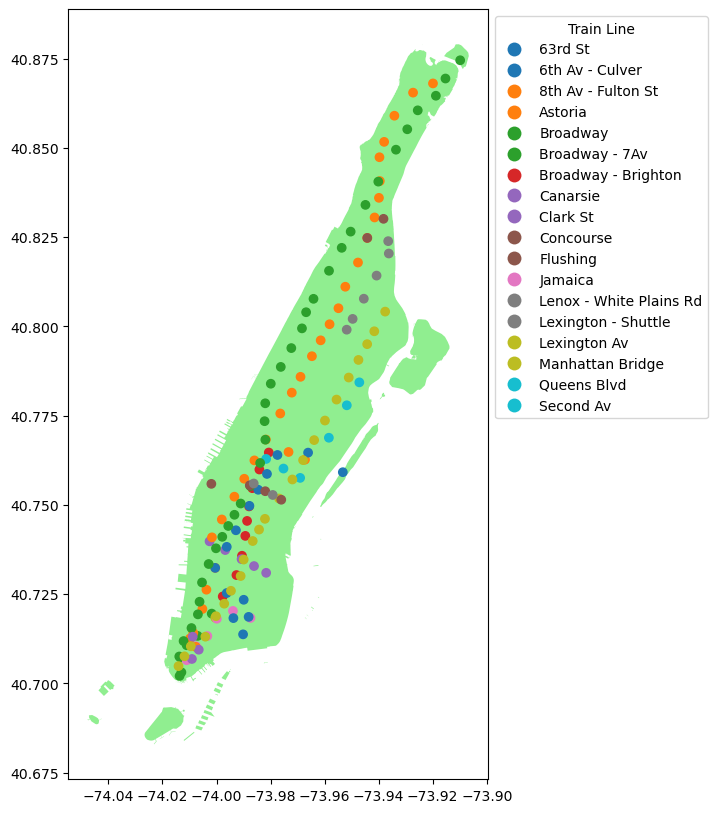

In [18]:
leg_kwds = {'title': 'Train Line', 'loc': 'best',
            'bbox_to_anchor': (1,1), 'ncol' : 1}
ax = man.plot(figsize = (8, 10), color = 'lightgreen')
manstops.plot( ax = ax, column = 'line', legend = True,
             legend_kwds = leg_kwds);
plt.show();

In [19]:
manstops.head()

,station_id,line,gtfs_stop_id,stop_name,gtfs_longitude,gtfs_latitude,geometry,index_right,name
6,7,Astoria,R11,Lexington Av/59 St,-73.967258,40.76266,POINT (-73.96726 40.76266),3,Manhattan
7,8,Astoria,R13,5 Av/59 St,-73.973347,40.764811,POINT (-73.97335 40.76481),3,Manhattan
8,9,Broadway - Brighton,R14,57 St-7 Av,-73.980658,40.764664,POINT (-73.98066 40.76466),3,Manhattan
9,10,Broadway - Brighton,R15,49 St,-73.984139,40.759901,POINT (-73.98414 40.75990),3,Manhattan
10,11,Broadway - Brighton,R16,Times Sq-42 St,-73.986754,40.754672,POINT (-73.98675 40.75467),3,Manhattan


In [28]:
my_map = folium.Map(location = ny_center, zoom_start = 11.4)

#folium.GeoJson(manstops).add_to(my_map)
#folium.GeoJson(burrows).add_to(ny_map)

for row_index, row_values in manstops.iterrows():
    if (row_values['line'] == 'Broadway - 7Av'):
        loc = [row_values['gtfs_latitude'], row_values['gtfs_longitude']]
        pop = str(row_values['stop_name'])
        icon = folium.Icon(color = 'green', icon = 'train', prefix = 'fa')

        marker = folium.Marker(
            location = loc,
            popup = pop, icon = icon)

        marker.add_to(my_map)

    elif (row_values['line'] == 'Lexington Av'):
        loc = [row_values['gtfs_latitude'], row_values['gtfs_longitude']]
        pop = str(row_values['stop_name'])
        icon = folium.Icon(color = 'orange', icon = 'train', prefix = 'fa')

        marker = folium.Marker(
            location = loc,
            popup = pop, icon = icon)

        marker.add_to(my_map)

    elif (row_values['line'] == '8th Av - Fulton St'):
        loc = [row_values['gtfs_latitude'], row_values['gtfs_longitude']]
        pop = str(row_values['stop_name'])
        icon = folium.Icon(color = 'purple', icon = 'train', prefix = 'fa')

        marker = folium.Marker(
            location = loc,
            popup = pop, icon = icon)

        marker.add_to(my_map)

    elif (row_values['line'] == '6th Av - Culver'):
        loc = [row_values['gtfs_latitude'], row_values['gtfs_longitude']]
        pop = str(row_values['stop_name'])
        icon = folium.Icon(color = 'red', icon = 'train', prefix = 'fa')

        marker = folium.Marker(
            location = loc,
            popup = pop, icon = icon)

        marker.add_to(my_map)

    elif (row_values['line'] == 'Broadway - Brighton'):
        loc = [row_values['gtfs_latitude'], row_values['gtfs_longitude']]
        pop = str(row_values['stop_name'])
        icon = folium.Icon(color = 'pink', icon = 'train', prefix = 'fa')

        marker = folium.Marker(
            location = loc,
            popup = pop, icon = icon)

        marker.add_to(my_map)
        
my_map